#  Time Series Smoothing Methods

---
> Erick Eduardo Aguilar Hernández:
> * mat.ErickAguilar@ciencias.unam.mx
> * isc.ErickAguilar@gmail.com
---

#  Introduction to time series
___

The succession of events and the way they relate to the concepts of present, past and future. Explaining the past and predicting the future is a reason for constant reflection and study from the origins of humanity.

In statistics there are some objetive techniques to predicting the future. Some techniques can be classified as descriptive and others as inferences when considering the presence of a probability distribution. All of them, of course, try to minimize errors in them and all rely on some fundamental principles:

* Have enought information about the past.
* The information must be quantifiable in some form of associated data at regular time intervals.
* It is assumed that there is some inertia in the studied phenomena that results in patterns that are repeated at least partially in the future.

From the descriptive point of view we can consider a time series as a set of tuples $\{(t, X)\}_{t=1}^n $ or $\{X_t\}_{t=1}^n $ where $ t $ is an index (usually time) and $ X $ is a corresponding value to the observation at time t of a variable of interest, under this paradigm it is possible to identify some elements or components of a time series:

* **Trend**: It is associated with the general direction presented by the graph of a time series. The trend can be manifested in the form of a straight line or a more complex function
* **Cyclical variations**: It refers to long-term oscillations, usually years, around the trend. Cycles in economics are associated with periods of prosperity or depression. They usually require many observations to identify their presence.
* **Seasonal variations**: Are oscillations of short duration (months, weeks or days) that usually present phenomena such as the sales of sporting goods or the consumption of electrical energy.
* **Random variations (Noise)**: Are irregularities due to the presence of unquantified or unknown factors that influence the behavior of the phenomenon.

**Example:** The following time series represents the number of stock prices during 8 years

,Yt
Mes,
01/01/90,169
01/02/90,127
01/03/90,235
01/04/90,314
01/05/90,343
01/06/90,345
01/07/90,377
01/08/90,346
01/09/90,348


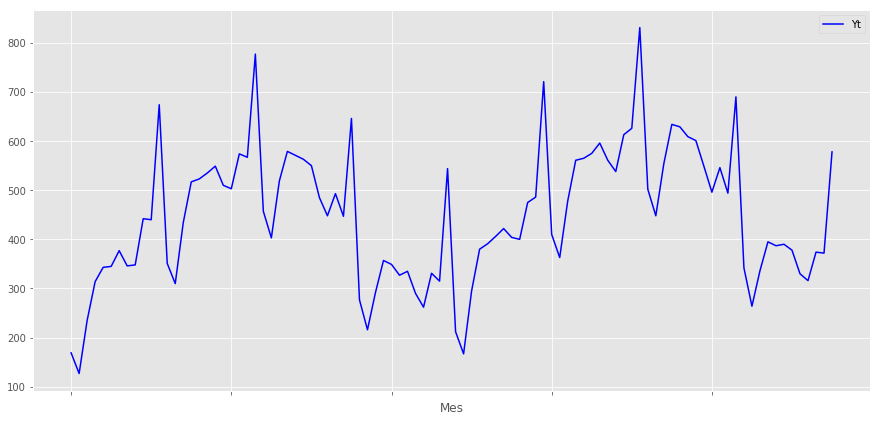

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
timeSeriesPD = pd.read_csv('DataSets/precios.csv',index_col='Mes')
display(timeSeriesPD[:12])
plt.style.use('ggplot')
plt.figure(figsize=(12,7))
timeSeriesPD[['Yt']].plot(figsize=(15,7),color='blue')
plt.show()

## Moving average smoothing
___

This one of the simplest forecasting procedures is to take the average k observations back and consider it the best forecast option for the next period. After a period, the last observation is added to the average and the last observation is discarded to calculate the average again. If particularly k=1, then the last observation is considered the best forecast for the subsequent one.


$$
\begin{align*}
\hat{Y}_{t+1} &= \frac{Y_{t}+Y_{t-1}+\dots+Y_{t-(k-1)}}{k} \\
&= \frac{Y_{t}+Y_{t-1}+\dots+Y_{t-(k-1)}}{k}+\frac{Y_{t-k}}{k}-\frac{Y_{t-k}}{k} \\
&= \frac{Y_t}{k} + \frac{Y_{t-1}+\dots+Y_{t-(k-1)}+Y_{t-k}}{k}-\frac{Y_{t-k}}{k} \\
&= \frac{Y_t}{k} + \hat{Y}_{t} -\frac{Y_{t-k}}{k} \\
\hat{Y}_{t+1} &= \hat{Y}_{t} + \frac{Y_t}{k} -\frac{Y_{t-k}}{k} \\
\end{align*}
$$

This equations derives an alternative form of moving average computation, based on the previous moving average, adding the difference between the last publication and the last previous observation. If the moving averages are computed consecutively, a smoothing of the series is observed. The larger the value of k, the greater the smoothing effect. This practice of smoothing or smoothing the series is often used as a filter for random variations.